In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [1]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

TensorFlow 1.x selected.
1.15.2


In [1]:
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras import optimizers
import scipy


from keras.models import load_model
from keras.preprocessing import image
import numpy as np
from os import listdir
from os.path import isfile, join

Using TensorFlow backend.


In [2]:
input_shape=(150,150,3)
img_width=150
img_height=150


nb_train_samples=1621
nb_validation_samples=82
batch_size=32
epochs=20

train_data_dir='/content/drive/My Drive/Colab Notebooks/Opencv_augmentation/train_image'
validation_data_dir='/content/drive/My Drive/Colab Notebooks/Opencv_augmentation/test_image'

In [3]:
#rescaling data
datagen=ImageDataGenerator(rescale=1./255)

train_generator=datagen.flow_from_directory(
         train_data_dir,
         target_size=(img_width,img_height),
         batch_size=8,
         class_mode='categorical')

validation_generator=datagen.flow_from_directory(
         validation_data_dir,
         target_size=(img_width,img_height),
         batch_size=16,
         class_mode='categorical')

Found 1621 images belonging to 3 classes.
Found 82 images belonging to 3 classes.


In [4]:
#model building
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

#flatten layer
model.add(Flatten()) # Output convert into one dimension layer and will go to Dense layer
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_9 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_10 (Activation)   (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 36, 36, 32)       

Adam Optimizer

In [ ]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("variation_dropout.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=5, verbose=1, mode='auto')

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
history=model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples//batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples//batch_size,
    callbacks=[checkpoint,early])

Epoch 1/20
50/50 [==============================] - 14s 275ms/step - loss: 1.1462 - accuracy: 0.3850 - val_loss: 0.8380 - val_accuracy: 0.5312

Epoch 00001: val_accuracy improved from -inf to 0.53125, saving model to variation_dropout.h5
Epoch 2/20
50/50 [==============================] - 13s 264ms/step - loss: 0.7303 - accuracy: 0.6775 - val_loss: 0.6697 - val_accuracy: 0.6562

Epoch 00002: val_accuracy improved from 0.53125 to 0.65625, saving model to variation_dropout.h5
Epoch 3/20
50/50 [==============================] - 13s 261ms/step - loss: 0.5132 - accuracy: 0.7985 - val_loss: 0.8223 - val_accuracy: 0.7222

Epoch 00003: val_accuracy improved from 0.65625 to 0.72222, saving model to variation_dropout.h5
Epoch 4/20
50/50 [==============================] - 13s 266ms/step - loss: 0.4520 - accuracy: 0.8250 - val_loss: 0.3719 - val_accuracy: 0.8125

Epoch 00004: val_accuracy improved from 0.72222 to 0.81250, saving model to variation_dropout.h5
Epoch 5/20
50/50 [=====================

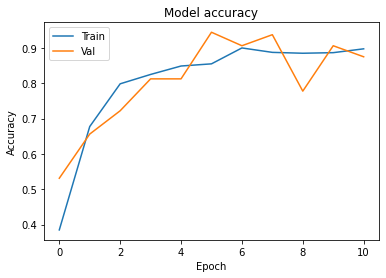

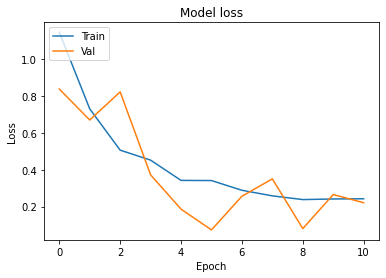

In [ ]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

SGD Optimifrom optimizer with momentum

In [ ]:
from keras.optimizers import SGD
#compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("SGD.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=5, verbose=1, mode='auto')

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
history=model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples//batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples//batch_size,
    callbacks=[checkpoint,early])

Epoch 1/20
50/50 [==============================] - 235s 5s/step - loss: 1.0617 - accuracy: 0.4600 - val_loss: 1.0197 - val_accuracy: 0.6562

Epoch 00001: val_accuracy improved from -inf to 0.65625, saving model to SGD.h5
Epoch 2/20
50/50 [==============================] - 291s 6s/step - loss: 0.8993 - accuracy: 0.5315 - val_loss: 0.8082 - val_accuracy: 0.5938

Epoch 00002: val_accuracy did not improve from 0.65625
Epoch 3/20
50/50 [==============================] - 287s 6s/step - loss: 0.7905 - accuracy: 0.6250 - val_loss: 0.8107 - val_accuracy: 0.7222

Epoch 00003: val_accuracy improved from 0.65625 to 0.72222, saving model to SGD.h5
Epoch 4/20
50/50 [==============================] - 274s 5s/step - loss: 0.6651 - accuracy: 0.7100 - val_loss: 0.5491 - val_accuracy: 0.6875

Epoch 00004: val_accuracy did not improve from 0.72222
Epoch 5/20
50/50 [==============================] - 19s 390ms/step - loss: 0.6925 - accuracy: 0.7025 - val_loss: 0.5828 - val_accuracy: 0.6875

Epoch 00005: va

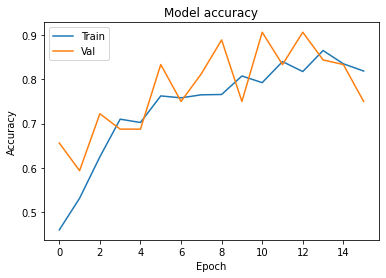

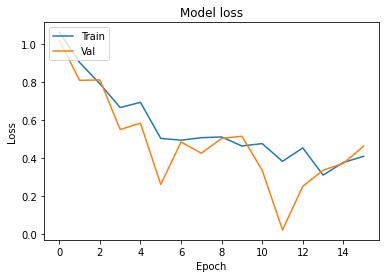

In [ ]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

SGD(Nesterov Accelerated Gradient Descent) optimizer

In [6]:
from keras.optimizers import SGD
#compile model
opt = SGD(lr=0.001, momentum=0.9,nesterov=True)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("SGD_nesterov.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=5, verbose=1, mode='auto')

In [8]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
history=model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples//batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples//batch_size,
    callbacks=[checkpoint,early])


Epoch 1/20
50/50 [==============================] - 287s 6s/step - loss: 1.1111 - accuracy: 0.3703 - val_loss: 1.0645 - val_accuracy: 0.4062

Epoch 00001: val_accuracy improved from -inf to 0.40625, saving model to SGD_nesterov.h5
Epoch 2/20
50/50 [==============================] - 285s 6s/step - loss: 0.9690 - accuracy: 0.5400 - val_loss: 0.8996 - val_accuracy: 0.6875

Epoch 00002: val_accuracy improved from 0.40625 to 0.68750, saving model to SGD_nesterov.h5
Epoch 3/20
50/50 [==============================] - 275s 6s/step - loss: 0.8604 - accuracy: 0.5750 - val_loss: 0.8658 - val_accuracy: 0.8333

Epoch 00003: val_accuracy improved from 0.68750 to 0.83333, saving model to SGD_nesterov.h5
Epoch 4/20
50/50 [==============================] - 283s 6s/step - loss: 0.7189 - accuracy: 0.6450 - val_loss: 0.7610 - val_accuracy: 0.6875

Epoch 00004: val_accuracy did not improve from 0.83333
Epoch 5/20
50/50 [==============================] - 17s 350ms/step - loss: 0.6699 - accuracy: 0.6574 - 

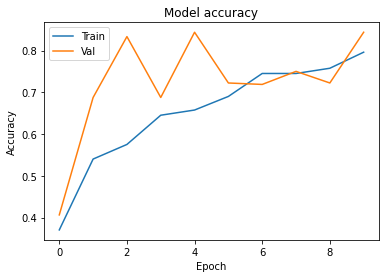

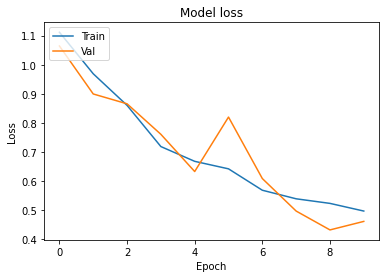

In [9]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

RMS-Prop optimizer(using reducedLRonplateau)

In [5]:
from keras.optimizers import RMSprop
#compile model
opt = RMSprop(lr=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
checkpoint = ModelCheckpoint("RMSprop.h5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=5, min_lr=0.001,mode='auto')

In [25]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
history=model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples//batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples//batch_size,
    callbacks=[checkpoint,reduce_lr])

Epoch 1/20
50/50 [==============================] - 2s 42ms/step - loss: 15.1885 - accuracy: 0.7225 - val_loss: 0.7767 - val_accuracy: 0.8125

Epoch 00001: val_loss improved from inf to 0.77666, saving model to RMSprop.h5
Epoch 2/20
50/50 [==============================] - 1s 30ms/step - loss: 0.4160 - accuracy: 0.8375 - val_loss: 0.6509 - val_accuracy: 0.5312

Epoch 00002: val_loss improved from 0.77666 to 0.65092, saving model to RMSprop.h5
Epoch 3/20
50/50 [==============================] - 2s 36ms/step - loss: 1.0010 - accuracy: 0.8125 - val_loss: 1.1921e-06 - val_accuracy: 0.7778

Epoch 00003: val_loss improved from 0.65092 to 0.00000, saving model to RMSprop.h5
Epoch 4/20
50/50 [==============================] - 2s 41ms/step - loss: 0.6565 - accuracy: 0.7557 - val_loss: 0.4680 - val_accuracy: 0.8125

Epoch 00004: val_loss did not improve from 0.00000
Epoch 5/20
50/50 [==============================] - 2s 37ms/step - loss: 0.6480 - accuracy: 0.8325 - val_loss: 0.8333 - val_accurac

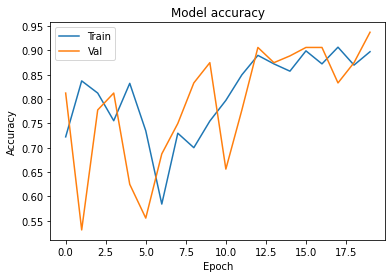

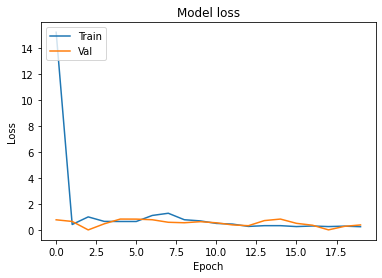

In [26]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

Nadam optimizer


In [12]:
from keras.optimizers import Nadam
#compile model
opt = Nadam(lr=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
checkpoint = ModelCheckpoint("Ndam.h5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=5, min_lr=0.001,mode='auto')

In [14]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
history=model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples//batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples//batch_size,
    callbacks=[checkpoint,reduce_lr])

Epoch 1/20
50/50 [==============================] - 2s 33ms/step - loss: 3.0525 - accuracy: 0.6448 - val_loss: 0.8183 - val_accuracy: 0.4688

Epoch 00001: val_loss improved from inf to 0.81830, saving model to Ndam.h5
Epoch 2/20
50/50 [==============================] - 1s 25ms/step - loss: 6.9611 - accuracy: 0.5100 - val_loss: 0.9184 - val_accuracy: 0.6875

Epoch 00002: val_loss did not improve from 0.81830
Epoch 3/20
50/50 [==============================] - 1s 25ms/step - loss: 1.1858 - accuracy: 0.4000 - val_loss: 1.0363 - val_accuracy: 0.7222

Epoch 00003: val_loss did not improve from 0.81830
Epoch 4/20
50/50 [==============================] - 1s 30ms/step - loss: 1.0039 - accuracy: 0.5200 - val_loss: 0.5560 - val_accuracy: 0.7500

Epoch 00004: val_loss improved from 0.81830 to 0.55605, saving model to Ndam.h5
Epoch 5/20
50/50 [==============================] - 1s 28ms/step - loss: 0.6954 - accuracy: 0.7000 - val_loss: 0.5551 - val_accuracy: 0.8125

Epoch 00005: val_loss improved f

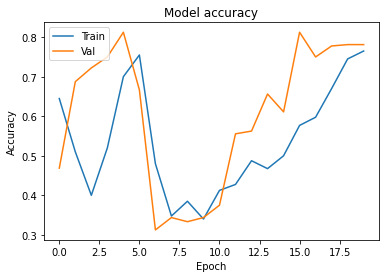

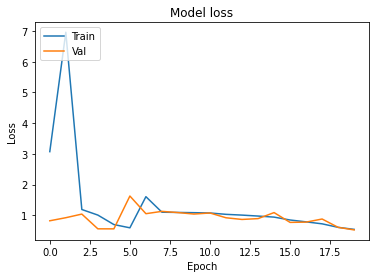

In [15]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

After the implementation of all five CNN models using five different optimizer the most balanced model i got in adam and SGD(reducedLRonplateau) model where the validation accuracy is repeatedly increased till the end epochs.

In RMS-Prop optimizer when i used reducedLRonplateau i callback after the first epoch the loss value decreased and after a particular epoch both the loss and validation loss are in same distribution.

Ndam CNN model(lr=0.001)

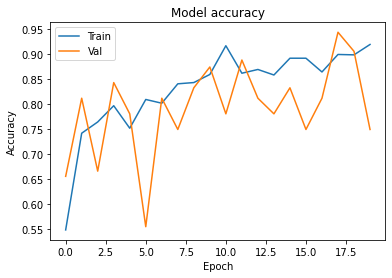

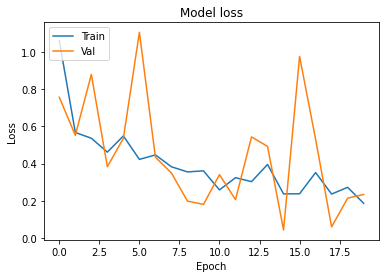

Ndam CNN model(lr=0.01)

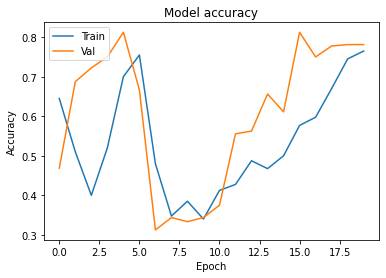

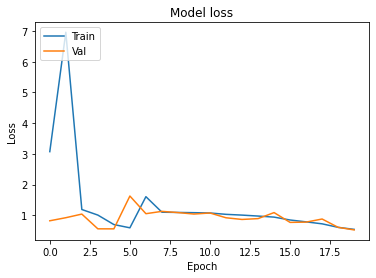